In [1]:
import sys
sys.dont_write_bytecode = True

from modules import dataFrame, dataHandler
import numpy as np
import scienceplots
import scipy.optimize as opt
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

folder_path = dataFrame.abs_path
LVDT_data_files = dataFrame.LVDT_data_files
VC_data_files = dataFrame.VC_data_files
Magnet_data_files = dataFrame.Magnet_data_files

### LVDT analysis - (Aluminum cylinder + magnet core) thickness check

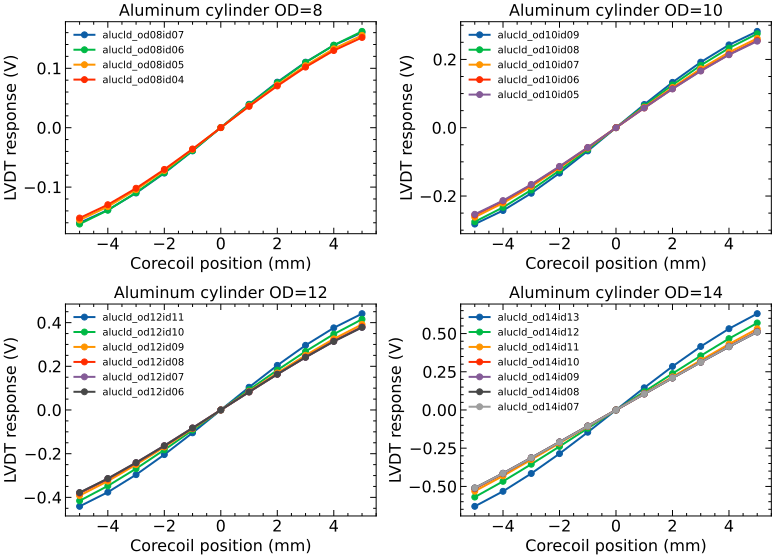

In [4]:
LVDT_alucld_od08_data = dataHandler.get_data(folder_path=folder_path, data=LVDT_data_files, group='LVDT_alucld_od08')
LVDT_alucld_od10_data = dataHandler.get_data(folder_path=folder_path, data=LVDT_data_files, group='LVDT_alucld_od10')
LVDT_alucld_od12_data = dataHandler.get_data(folder_path=folder_path, data=LVDT_data_files, group='LVDT_alucld_od12')
LVDT_alucld_od14_data = dataHandler.get_data(folder_path=folder_path, data=LVDT_data_files, group='LVDT_alucld_od14')
LVDT_alucld_od08_magcore_data = dataHandler.get_data(folder_path=folder_path, data=LVDT_data_files, group='LVDT_alucld_od08_magcore_d04_l06')
LVDT_alucld_od10_magcore_data = dataHandler.get_data(folder_path=folder_path, data=LVDT_data_files, group='LVDT_alucld_od10_magcore_d04_l06')
LVDT_alucld_od12_magcore_data = dataHandler.get_data(folder_path=folder_path, data=LVDT_data_files, group='LVDT_alucld_od12_magcore_d04_l06')
LVDT_alucld_od14_magcore_data = dataHandler.get_data(folder_path=folder_path, data=LVDT_data_files, group='LVDT_alucld_od14_magcore_d04_l06')

plt.style.use(['science','no-latex','notebook'])
plt.figure(figsize=(11, 8))
plt.subplot(2,2,1)
# for key in LVDT_alucld_od_08_data:
#     data = LVDT_alucld_od_08_data[key]
#     position = data['CC_pos']
#     plt.plot(position, data['MC_volt_abs'], marker = '|', markersize = 10, label=key+ 'no magcore')
for key in LVDT_alucld_od08_magcore_data:
    data = LVDT_alucld_od08_magcore_data[key]
    position = data['CC_pos']
    plt.plot(position, data['MC_volt_abs'], marker = 'o', markersize = 6, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('Aluminum cylinder OD=8')

plt.subplot(2,2,2)
# for key in LVDT_alucld_od_10_data:
#     data = LVDT_alucld_od_10_data[key]
#     plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = '|', markersize = 10, label=key+' (no magcore)')
for key in LVDT_alucld_od10_magcore_data:
    data = LVDT_alucld_od10_magcore_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = 'o', markersize = 6, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('Aluminum cylinder OD=10')

plt.subplot(2,2,3)
# for key in LVDT_alucld_od_12_data:
#     data = LVDT_alucld_od_12_data[key]
#     plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = '|', markersize = 10, label=key+' (no magcore)')
for key in LVDT_alucld_od12_magcore_data:
    data = LVDT_alucld_od12_magcore_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = 'o', markersize = 6, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('Aluminum cylinder OD=12')

plt.subplot(2,2,4)
# for key in LVDT_alucld_od_14_data:
#     data = LVDT_alucld_od_14_data[key]
#     plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = '|', markersize = 10, label=key+' (no magcore)')
for key in LVDT_alucld_od14_magcore_data:
    data = LVDT_alucld_od14_magcore_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = 'o', markersize = 6, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('Aluminum cylinder OD=14')
plt.tight_layout()


### LVDT analysis - (Magnet only) diameter and length check

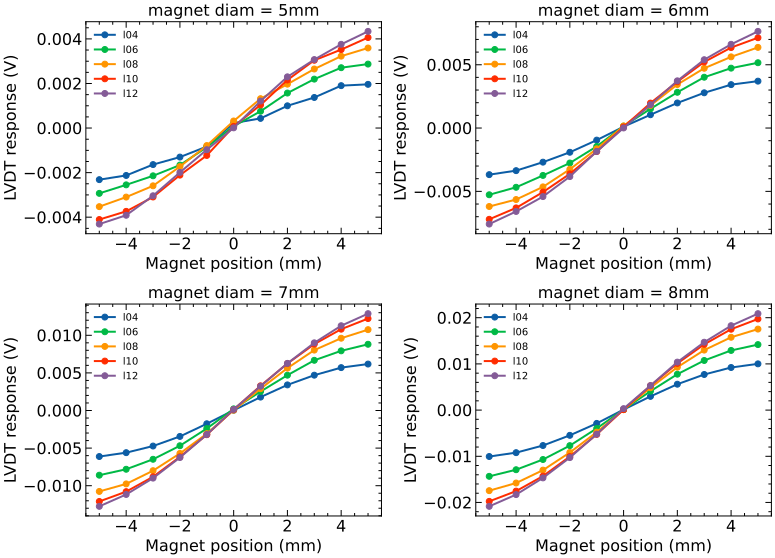

In [5]:
LVDT_magcore_d5_data = dataHandler.get_data(folder_path=folder_path, data=Magnet_data_files, group='LVDT_magcore_d05')
LVDT_magcore_d6_data = dataHandler.get_data(folder_path=folder_path, data=Magnet_data_files, group='LVDT_magcore_d06')
LVDT_magcore_d7_data = dataHandler.get_data(folder_path=folder_path, data=Magnet_data_files, group='LVDT_magcore_d07')
LVDT_magcore_d8_data = dataHandler.get_data(folder_path=folder_path, data=Magnet_data_files, group='LVDT_magcore_d08')

plt.style.use(['science','no-latex','notebook'])
plt.figure(figsize=(11, 8))
plt.subplot(2,2,1)
for key in LVDT_magcore_d5_data:
    data = LVDT_magcore_d5_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = 'o', markersize = 6, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Magnet position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('magnet diam = 5mm')

plt.subplot(2,2,2)
for key in LVDT_magcore_d6_data:
    data = LVDT_magcore_d6_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = 'o', markersize = 6, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Magnet position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('magnet diam = 6mm')

plt.subplot(2,2,3)
for key in LVDT_magcore_d7_data:
    data = LVDT_magcore_d7_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = 'o', markersize = 6, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Magnet position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('magnet diam = 7mm')

plt.subplot(2,2,4)
for key in LVDT_magcore_d8_data:
    data = LVDT_magcore_d8_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = 'o', markersize = 6, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Magnet position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('magnet diam = 8mm')

plt.tight_layout()

### lvdt analysis - fred default design check

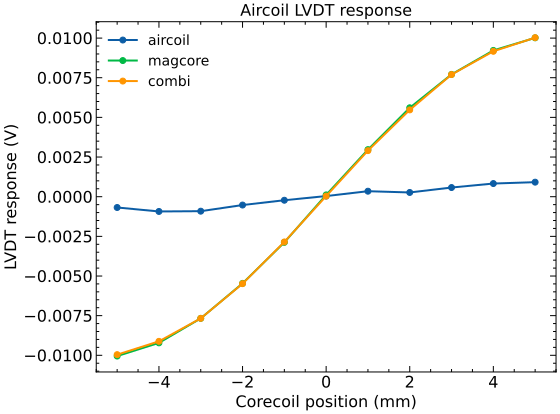

In [6]:
aircoil_data = dataHandler.get_data(folder_path=folder_path,data=LVDT_data_files, group = 'LVDT_aircoil')
plt.style.use(['science','no-latex','notebook'])
plt.figure(figsize=(8, 6))
for key in aircoil_data:
    data = aircoil_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], 'o-', label=key)
plt.title('Aircoil LVDT response')
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.legend(fontsize = 14)
plt.tight_layout()

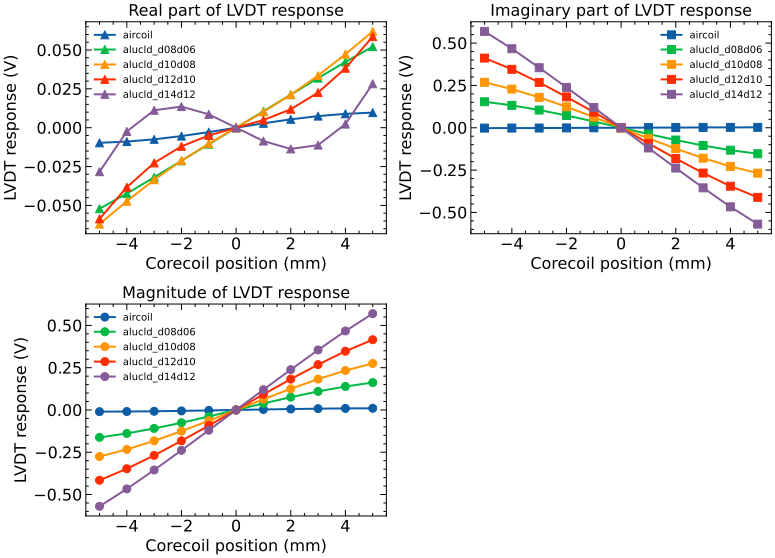

In [9]:
LVDT_combi_data = {
    'aircoil'      : dataHandler.get_data(folder_path=folder_path, data=LVDT_data_files, 
                                           group = 'LVDT_aircoil', key ='combi'),
    'alucld_d08d06': dataHandler.get_data(folder_path=folder_path, data=LVDT_data_files, 
                                           group = 'LVDT_alucld_od08_magcore_d04_l06', key =  'alucld_od08id06'),
    'alucld_d10d08': dataHandler.get_data(folder_path=folder_path, data=LVDT_data_files,
                                           group='LVDT_alucld_od10_magcore_d04_l06', key='alucld_od10id08'),
    'alucld_d12d10': dataHandler.get_data(folder_path=folder_path, data=LVDT_data_files,
                                           group='LVDT_alucld_od12_magcore_d04_l06', key='alucld_od12id10'), 
    'alucld_d14d12': dataHandler.get_data(folder_path=folder_path, data=LVDT_data_files,
                                           group='LVDT_alucld_od14_magcore_d04_l06', key='alucld_od14id12')}
plt.style.use(['science','no-latex','notebook'])
plt.figure(figsize=(11, 8))
plt.subplot(2, 2, 1)
for key in LVDT_combi_data:
    data = LVDT_combi_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_real'], marker = '^', markersize = 8, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('Real part of LVDT response')

plt.subplot(2, 2, 2)
for key in LVDT_combi_data:
    data = LVDT_combi_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_imag'], marker = 's', markersize = 8, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('Imaginary part of LVDT response')

plt.subplot(2, 2, 3)
for key in LVDT_combi_data:
    data = LVDT_combi_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = 'o', markersize = 8, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('Magnitude of LVDT response')

plt.tight_layout()

Optimal parameters: [ 2.98652267e+00 -7.87691004e-04]
Optimal parameters: [ 2.88157295e+00 -2.56733364e-03]
Optimal parameters: [2.72996551 0.00632095]
Optimal parameters: [ 2.65800533e+00 -1.97150701e-03]
Optimal parameters: [2.63840074 0.00709054]


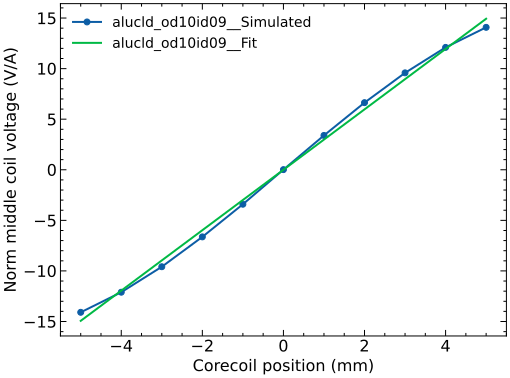

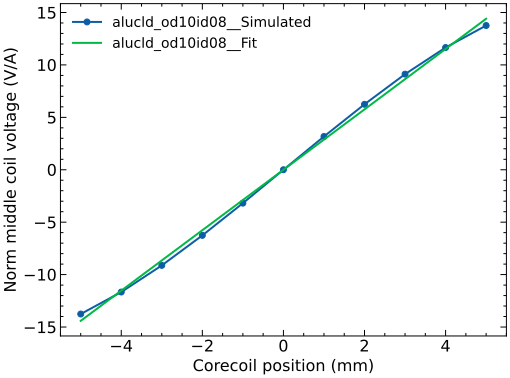

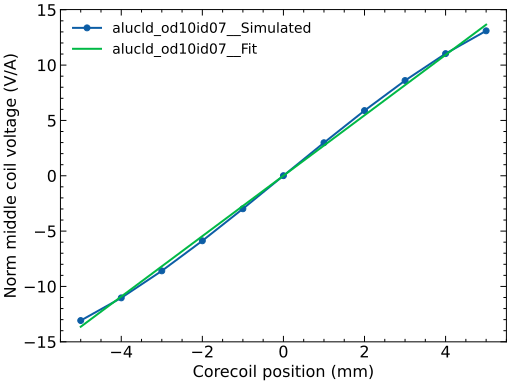

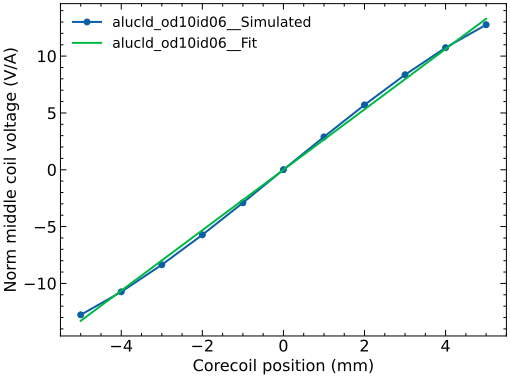

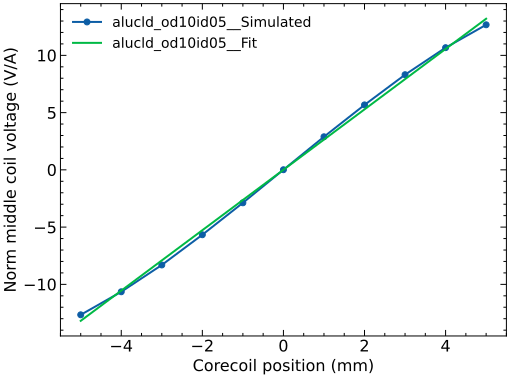

In [12]:
target = LVDT_alucld_od10_data
for key in target:
    data  = target[key]
    norm_factor = 0.02
    Gain = 70 
    def linfunc(x, a, b):
        return a*x + b
    plt.style.use(['science','no-latex','notebook'])
    popt, pcov = opt.curve_fit(linfunc, data['CC_pos'], data['MC_volt_abs']/norm_factor)
    fitted_data = linfunc(data['CC_pos'], *popt)
    print('Optimal parameters:', popt)
    plt.figure(figsize=(8,6))
    plt.plot(data['CC_pos'], data['MC_volt_abs']/norm_factor, 'o-', label=key + '__Simulated', )
    plt.plot(data['CC_pos'], fitted_data, label=key + '__Fit')
    plt.xlabel('Corecoil position (mm)')
    plt.ylabel('Norm middle coil voltage (V/A)')
    # the response is the slope value with the unit V/mmA
    # plt.title('Fitted response of MC (Gain=70):' f'{opt_params[0]*Gain:.2f} V/mmA', fontsize = 12) 
    plt.legend(fontsize = 14)
    plt.show()

## VC analysis


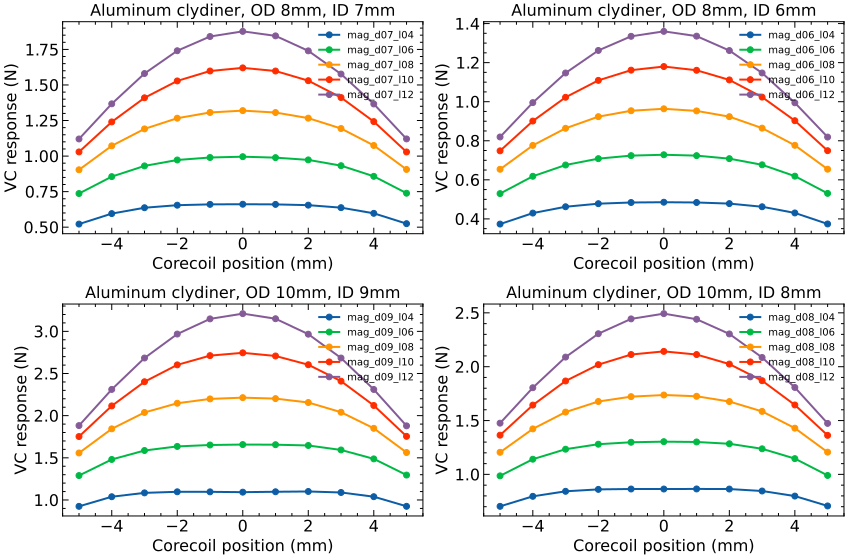

In [14]:
VC_alucld_d08d07_data = dataHandler.get_data(folder_path = folder_path, data = VC_data_files, group = 'VC_alucld_d08d07')
VC_alucld_d08d06_data = dataHandler.get_data(folder_path = folder_path, data = VC_data_files, group = 'VC_alucld_d08d06')
VC_alucld_d10d09_data = dataHandler.get_data(folder_path = folder_path, data = VC_data_files, group = 'VC_alucld_d10d09')
VC_alucld_d10d08_data = dataHandler.get_data(folder_path = folder_path, data = VC_data_files, group = 'VC_alucld_d10d08')

plt.style.use(['science','no-latex','notebook'])
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for key in VC_alucld_d08d07_data:
    data = VC_alucld_d08d07_data[key]
    plt.plot(data['CC_pos'], abs(data['OC_low_force'] + data['OC_upp_force']), 'o-', label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('VC response (N)')
plt.title('Aluminum clydiner, OD 8mm, ID 7mm')

plt.subplot(2, 2, 2)
for key in VC_alucld_d08d06_data:
    data = VC_alucld_d08d06_data[key]
    plt.plot(data['CC_pos'], abs(data['OC_low_force'] + data['OC_upp_force']), 'o-', label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('VC response (N)')
plt.title('Aluminum clydiner, OD 8mm, ID 6mm')

plt.subplot(2, 2, 3)
for key in VC_alucld_d10d09_data:
    data = VC_alucld_d10d09_data[key]
    plt.plot(data['CC_pos'], abs(data['OC_low_force'] + data['OC_upp_force']), 'o-', label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('VC response (N)')
plt.title('Aluminum clydiner, OD 10mm, ID 9mm')

plt.subplot(2, 2, 4)
for key in VC_alucld_d10d08_data:
    data = VC_alucld_d10d08_data[key]
    plt.plot(data['CC_pos'], abs(data['OC_low_force'] + data['OC_upp_force']), 'o-', label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('VC response (N)')
plt.title('Aluminum clydiner, OD 10mm, ID 8mm')
plt.tight_layout()
